In [67]:
import os
from dotenv import load_dotenv
import requests
import xmltodict, json
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textwrap import wrap
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from collections import defaultdict
from spacy_langdetect import LanguageDetector
import spacy
import en_core_web_lg

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**<font color='teal'>get api key from .env file</font>**

In [2]:
load_dotenv()
API_KEY = os.getenv('API_KEY')

**<font color='teal'>Use Global Giving's API to access all active projects with respective themes</font>**

In [3]:
# Assign URL to variable: url
url = 'https://api.globalgiving.org/api/public/projectservice/themes/projects/ids?api_key={}'.format(API_KEY)

# Package the request, send the request and catch the response: r
r = requests.get(url)

**<font color='teal'>The response is in xml format, so we will use xmltodict to convert it to a dictionary</font>**

In [4]:
data_dict = xmltodict.parse(r.text)

**<font color='teal'>Next I will take a look at the keys find what will lead me to the themes and the project ID's</font>**

In [16]:
print(data_dict['themes']['theme'][27]['name'])
print(data_dict['themes']['theme'][27]['projects']['project'][430]['id'])

Wildlife Conservation
20480


**<font color='teal'>Next I will use a for loop to get a dictionary with the just the themes and their respective projects. This dictionary will be named "theme_and_proj_id"</font>**

In [25]:
theme_and_proj_id = {}

for i in range(len(data_dict['themes']['theme'])):
    theme = data_dict['themes']['theme'][i]['name']
    project_id_list = []
    for j in range(len(data_dict['themes']['theme'][i]['projects']['project'])):
        project_id_list.append(int(data_dict['themes']['theme'][i]['projects']['project'][j]['id']))
    theme_and_proj_id[theme] = project_id_list

theme_and_proj_id.keys()

dict_keys(['Animal Welfare', 'Child Protection', 'Climate Action', 'Peace and Reconciliation', 'Disaster Response', 'Economic Growth', 'Education', 'Ecosystem Restoration', 'Gender Equality', 'Physical Health', 'Ending Human Trafficking', 'Justice and Human Rights', 'Sport', 'Digital Literacy', 'Food Security', 'Arts and Culture', 'LGBTQIA+ Equality', 'COVID-19', 'Clean Water', 'Disability Rights', 'Ending Abuse', 'Mental Health', 'Racial Justice', 'Refugee Rights', 'Reproductive Health', 'Safe Housing', 'Sustainable Agriculture', 'Wildlife Conservation'])

**<font color='teal'>Next I want to access the summary, challenge, solution, and long term impact of a [project](https://www.globalgiving.org/projects/trees-for-tribes-1/) using Global Giving's API.</font>**

In [41]:
# Assign URL to variable: url
url = 'https://api.globalgiving.org/api/public/projectservice/projects/39630?api_key=efee163e-82d8-413b-955e-c2dcc7b4bfba'

# Package the request, send the request and catch the response: r
project = requests.get(url)

# Print the text of the response
projectinfo_dict = xmltodict.parse(project.text)
theme = projectinfo_dict['project']['themeName']
longtermimpact = projectinfo_dict['project']['longTermImpact']
challenge = projectinfo_dict['project']['need']
summary = projectinfo_dict['project']['summary']
solution = projectinfo_dict['project']['activities']
title = projectinfo_dict['project']['title']

In [42]:
theme

'Animal Welfare'

In [43]:
title

'Instituto Projeto Esportivo e Sociocultural JB12'

In [70]:
summary
nlp = spacy.load('en_core_web_lg')  # 1

doc = nlp(summary)
print(doc)
#detect_language = doc._.language
#print(detect_language)

Inovar, motivar e realizar acoes esportivas de cunho humanista, cidadao, socioeducativo e cultural, prioritariamente pelo e para os(a) jovens, na perspectiva de contribuir para que sejam protagonistas de sua propria historia


In [74]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import en_core_web_sm



def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = en_core_web_sm.load()
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
text = summary
doc = nlp(text)
print(doc._.language)

{'language': 'pt', 'score': 0.9999936071132508}


In [60]:
challenge
detector = google_translator()  
detect_result = detector.detect(challenge)
# <Detect text=สวัสดีจีน >  
print(detect_result)

Exception: 

In [49]:
type(solution)

NoneType

In [48]:
longtermimpact

'Inovar, motivar e realizar acoes esportivas de cunho humanista, cidadao, socioeducativo e cultural, prioritariamente pelo e para os(a) jovens, na perspectiva de contribuir para que sejam protagonistas de sua propria historia'

**<font color='teal'>Here I will combine the title, summary, challenge, and solution into one long text, which I will clean and get ready for NLP</font>**

In [18]:
text = title + ' ' + summary + ' ' + challenge + ' ' + solution + ' ' + longtermimpact

#lowercase the text
text=text.lower()

#remove numbers
text = ''.join([i for i in text if not i.isdigit()])

#replace hyphens with spaces
text = text.replace('-', ' ')

#remove punctuation
punct = string.punctuation
text = text.translate(str.maketrans('','', punct))

#remove extra spaces
text = " ".join(text.split())

#remove stopwords
stop_words = set(stopwords.words('english')) 

# Tokenize the sentence
words = word_tokenize(text)
filtered_list = []
for w in words:
    if w.lower() not in stop_words:
        filtered_list.append(w)
text = " ".join(filtered_list)

#Use lemmatization
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

tokens = word_tokenize(text)
lemma_function = WordNetLemmatizer()
lemma_list = []
for token, tag in pos_tag(tokens):
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    lemma_list.append(lemma)
    
text = " ".join(lemma_list)
text

'bring fruit tree native american reservation tree tribes support native american community effort toward food sovereignty food justice plant fruit tree orchard provide abundant harvest nutritious fruit tribal member also build skill relearn important technique care orchard preserve harvest program ftpf plant dozen orchard fill hundred fruit tree provide arboricultural training tribal community across turtle island hunger grow problem native american family american indian household experience food insecurity young tribal member greatly affect hunger poverty child age live poverty poverty food insecurity also come obesity relate challenge include heart disease diabetes project benefit tribal community age support healthy lifelong choice access fresh food encourage consumption fresh food make easy access food one key improve food security health low income native american tree tribes address issue provide fruit tree orchard native american community volunteerism encourage offering house

**<font color='teal'>Next, I will combine the steps above into a function that takes in a project URL and outputs clean text</font>**

In [19]:
def get_clean_text(url):
    # Package the request, send the request and catch the response: r
    project = requests.get(url)

    # Print the text of the response
    projectinfo_dict = xmltodict.parse(project.text)
    theme = projectinfo_dict['project']['themeName']
    longtermimpact = projectinfo_dict['project']['longTermImpact']
    challenge = projectinfo_dict['project']['need']
    summary = projectinfo_dict['project']['summary']
    solution = projectinfo_dict['project']['activities']
    title = projectinfo_dict['project']['title']
    
    text = title + ' ' + summary + ' ' + challenge + ' ' + solution + ' ' + longtermimpact

    #lowercase the text
    text=text.lower()

    #remove numbers
    text = ''.join([i for i in text if not i.isdigit()])

    #replace hyphens with spaces
    text = text.replace('-', ' ')

    #remove punctuation
    punct = string.punctuation
    text = text.translate(str.maketrans('','', punct))

    #remove extra spaces
    text = " ".join(text.split())

    #remove stopwords
    stop_words = set(stopwords.words('english')) 

    # Tokenize the sentence
    words = word_tokenize(text)
    filtered_list = []
    for w in words:
        if w.lower() not in stop_words:
            filtered_list.append(w)
    text = " ".join(filtered_list)

    #Use lemmatization
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    tokens = word_tokenize(text)
    lemma_function = WordNetLemmatizer()
    lemma_list = []
    for token, tag in pos_tag(tokens):
        lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
        lemma_list.append(lemma)

    text = " ".join(lemma_list)
    return text

**<font color='teal'>Here I will randomly select 20 projects from the following themes: COVID-19, disaster response, climate action, education, and gender equality. Then I will use the function I just created to extract and clean the text for each project</font>**

In [93]:
popular_themes = ['COVID-19','Disaster Response','Climate Action','Education','Gender Equality']

project_ids = []
themes = []
texts = []

for theme in popular_themes:
    IDs = random.sample(theme_and_proj_id[theme],20)
    for ID in IDs:
        themes.append(theme)
        project_ids.append(ID)
        url = 'https://api.globalgiving.org/api/public/projectservice/projects/{}?api_key={}'.format(str(ID),API_KEY)
        text = get_clean_text(url)
        texts.append(text)

**<font color='teal'>The next step is to use the bag-of-words model to count the words in each of the texts. This will also be organized in Pandas DataFrame.</font>**

In [94]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(texts)
bw = pd.DataFrame(counts.toarray(),columns=count_vect.get_feature_names(),index=project_ids)
bw['theme'] = themes

C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**<font color='teal'>Here I will look at the most common words for each theme</font>**

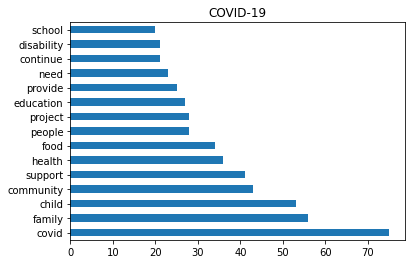

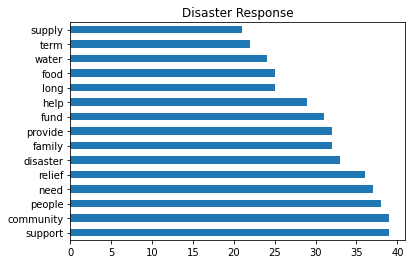

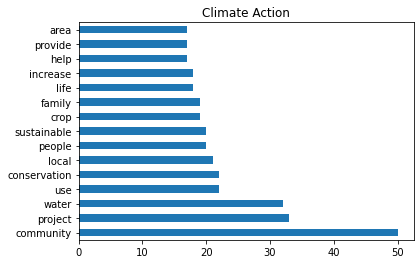

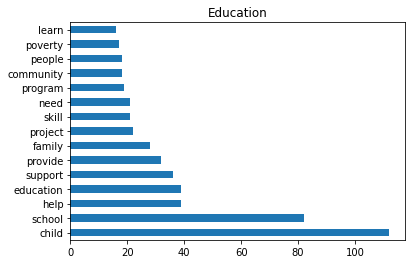

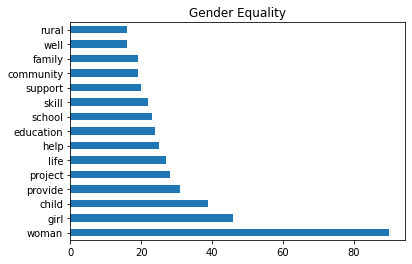

In [95]:
grouped_bw = bw.groupby('theme').sum()
for theme in popular_themes:
    theme_df = grouped_bw.loc[theme].sort_values(ascending = False)
    most_common_words = grouped_bw.loc[theme].sort_values(ascending = False).index[:15]
    fig, ax = plt.subplots()
    theme_df[most_common_words].plot.barh()
    ax.set_title(theme)
    plt.show()

In [96]:
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(texts)
tfid = pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=project_ids)
tfid

C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aap,aarti,abandon,abate,abet,ability,able,abnormal,abortion,abroad,...,yieldand,yo,york,young,youth,yr,yrs,zagreb,zimbabwe,zone
49138,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
48818,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49321,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.07773,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50299,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
48008,0.000000,0.0,0.0,0.0,0.0,0.0394,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31275,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
36956,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.054882,0.0,0.0,0.0,0.0,0.0,0.0
29763,0.132269,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
30194,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


**<font color='teal'>Since it didn't take long to obtain 20 projects for the most popular themes, now I will attempt to get all the projects and organize this into a .csv file.</font>**

In [40]:
themes = theme_and_proj_id.keys()

project_ids = []
texts = []

for theme in themes:
    print(theme)
    IDs = theme_and_proj_id[theme]
    for ID in IDs:
        project_ids.append(ID)
        print(ID)
        url = 'https://api.globalgiving.org/api/public/projectservice/projects/{}?api_key={}'.format(str(ID),API_KEY)
        text = get_clean_text(url)
        texts.append(text)
        
df = pd.DataFrame({'project_id':project_ids,'text':texts,'theme':themes})
df.to_csv('raw_data.csv')

Animal Welfare
22244
30154
33084
35906
41112
41894
1408
36811
43881
14998
15892
39395
44512
54319
56190
53887
13583
15111
42504
48653
15220
38164
38166
39381
51116
53108
55344
19585
39313
50806
53002
39446
51811
23005
39630


TypeError: can only concatenate str (not "NoneType") to str

In [30]:
df

,project_id,text,theme


In [22]:
theme_and_proj_id.keys()

dict_keys(['Animal Welfare', 'Child Protection', 'Climate Action', 'Peace and Reconciliation', 'Disaster Response', 'Economic Growth', 'Education', 'Ecosystem Restoration', 'Gender Equality', 'Physical Health', 'Ending Human Trafficking', 'Justice and Human Rights', 'Sport', 'Digital Literacy', 'Food Security', 'Arts and Culture', 'LGBTQIA+ Equality', 'COVID-19', 'Clean Water', 'Disability Rights', 'Ending Abuse', 'Mental Health', 'Racial Justice', 'Refugee Rights', 'Reproductive Health', 'Safe Housing', 'Sustainable Agriculture', 'Wildlife Conservation'])

In [35]:
themes = theme_and_proj_id.keys()
for theme in themes:
    IDs = theme_and_proj_id[theme]
    print(IDs)

[22244, 30154, 33084, 35906, 41112, 41894, 1408, 36811, 43881, 14998, 15892, 39395, 44512, 54319, 56190, 53887, 13583, 15111, 42504, 48653, 15220, 38164, 38166, 39381, 51116, 53108, 55344, 19585, 39313, 50806, 53002, 39446, 51811, 23005, 39630, 51721, 46101, 55842, 21376, 10834, 31795, 32933, 35524, 38721, 45150, 53881, 54512, 31046, 31578, 8696, 15792, 33449, 36034, 37206, 40235, 45539, 8473, 48057, 49430, 8465, 12552, 30406, 31469, 43008, 44595, 29223, 54424, 27069, 52291, 35064, 36595, 41337, 56262, 13173, 14149, 16333, 33261, 35509, 35869, 45216, 47315, 52739, 8348, 10671, 15369, 19396, 24392, 26319, 18332, 14586, 19007, 35037, 51243, 47326, 54587, 39076, 29195, 55338, 14155, 33030, 41029, 6935, 10148, 16665, 21388, 42712, 43448, 44877, 45536, 46011, 46826, 45542, 51705, 50948, 5994, 3984, 53493, 48883, 13187, 22719, 25104, 21996, 10336, 21618, 23742, 24980, 26817, 30608, 42601, 45945, 48166, 49416, 51176, 54733, 54897, 55864, 56130, 56268, 7041, 9024, 10685, 19455, 22981, 25128, 2